Caso Banco “Monopoly/Dormammu”

El banco Monopoly lleva muchos años atendiendo a sus clientes en Chile y recientemente ha sido adquirido por un Banco con capitales extranjeros llamado “Dormammu”.

Dormammu ha encargado a sus ingenieros hacer estudios sobre los clientes del banco Monopoly, para conocer su comportamiento y detectar patrones. Además, debe analizar cómo será su estrategia para abordar estos nuevos clientes dado el uso que ellos hacen de sus productos financieros.

Los ingenieros del área informática del banco Monopoly han extraído una base de datos según una solicitud recibida por el nuevo dueño del banco y la han compartido con los ingenieros de Dormammu que están en la sede de New York. La base contiene una muestra de clientes con 12 meses de información almacenada en variables mensuales por cada cliente.

Usted es parte del equipo de ingenieros del banco Dormammu, y con sus colegas debe analizar esta base, limpiarla, seleccionar las variables que sirvan para alguna interpretación y entregar la mayor información posible a los dueños de este banco para que puedan conocer a los clientes, preparar una estrategia y abordar a este nuevo mercado.

La base de datos tiene variables asociadas a información del cliente y variables mensuales, es decir una por cada mes, el cliente no se repite y las variables asociadas se van agregando como una columna más. Con esto, la base de datos tiene 574 variables y 51.124 registros.



---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [ ]:
cols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55]
data = pd.read_csv('/content/Base_clientes_Monopoly.csv', sep=';', skiprows=1, index_col=0, usecols=cols, low_memory=False)
df1 = pd.DataFrame(data)

FileNotFoundError: ignored

Renombrando las columnas:

In [ ]:
from google.colab import drive
drive.mount('/content/drive.csv')

Drive already mounted at /content/drive.csv; to attempt to forcibly remount, call drive.mount("/content/drive.csv", force_remount=True).


In [ ]:
df1 = df1.drop(df1.index[0]) # Eliminar la fila de Nombre de Variables

Clase de Archivo:


In [ ]:
type(df1)

pandas.core.frame.DataFrame

Clase de Variables (columnas)

In [ ]:
df1.dtypes

Subsegmento         int64
Sexo               object
Region            float64
Edad                int64
Renta             float64
Antiguedad          int64
Internauta          int64
Adicional           int64
Dualidad            int64
Monoproducto        int64
Ctacte              int64
Consumo             int64
Hipotecario         int64
Debito              int64
CambioPin         float64
Cuentas             int64
TC                  int64
CUPO_L1             int64
CUPO_L2            object
CUPO_MX             int64
FlgAct_T12        float64
FlgActCN_T12      float64
FlgActCI_T12      float64
FlgActAN_T12      float64
FlgActAI_T12      float64
FlgActPAT_T12     float64
FlgActCCPC_T12    float64
FlgActCCOT_T12    float64
FlgActCOL_T12     float64
Fac_T12            object
Txs_T12           float64
FacCN_T12         float64
TxsCN_T12         float64
FacCI_T12          object
TxsCI_T12         float64
FacAN_T12         float64
TxsAN_T12         float64
FacAI_T12          object
TxsAI_T12   

Cantidad de Datos: 51124 datos, 574 variables

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4912 entries, 1 to 4912
Data columns (total 55 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Subsegmento     4912 non-null   int64  
 1   Sexo            4912 non-null   object 
 2   Region          4907 non-null   float64
 3   Edad            4912 non-null   int64  
 4   Renta           4233 non-null   float64
 5   Antiguedad      4912 non-null   int64  
 6   Internauta      4912 non-null   int64  
 7   Adicional       4912 non-null   int64  
 8   Dualidad        4912 non-null   int64  
 9   Monoproducto    4912 non-null   int64  
 10  Ctacte          4912 non-null   int64  
 11  Consumo         4912 non-null   int64  
 12  Hipotecario     4912 non-null   int64  
 13  Debito          4912 non-null   int64  
 14  CambioPin       2865 non-null   float64
 15  Cuentas         4912 non-null   int64  
 16  TC              4912 non-null   int64  
 17  CUPO_L1         4912 non-null   i

In [ ]:
df1.shape

(4912, 55)

In [ ]:
df1.head()

,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,...,FacCOL_T12,TxsCOL_T12,FacDebCom_T12,TxsDebCom_T12,FacDebAtm_T12,TxsDebAtm_T12,Col_T12,ColL1T0_T12,ColL1TE_T12,ColL2T0_T12
Id,,,,,,,,,,,,,,,,,,,,,
1,160,M,13.0,43,NaN,130,1,1,0,0,...,0.0,0.0,247982.0,30.0,70000.0,6.0,675198,0.0,675198.0,0.0
2,160,H,13.0,46,143640.0,69,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,370529,10000.0,82504.0,278025.0
3,170,H,13.0,45,929106.0,24,1,1,0,0,...,0.0,0.0,52780.0,5.0,745000.0,16.0,123950,123950.0,0.0,0.0
4,151,H,13.0,46,172447.0,134,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,343226,20000.0,315896.0,7330.0
5,170,H,13.0,46,805250.0,116,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,177973,55276.0,0.0,122697.0


Cantidad de Mujeres y Hombres en la base de datos:

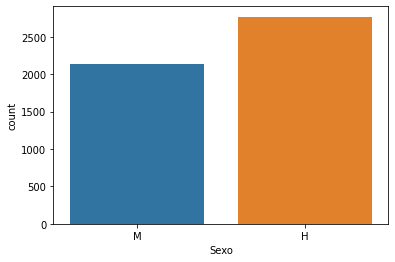

In [ ]:
sns.countplot(x=df1["Sexo"], data=df1)

Existen más Hombres que Mujeres.

Aqui podemos decir que la mayoria de los usuarios se encuentran entre 20 y 40 años

(array([2.680e+02, 6.250e+02, 1.356e+03, 2.505e+03, 1.390e+02, 1.000e+01,
        4.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([25. , 31.2, 37.4, 43.6, 49.8, 56. , 62.2, 68.4, 74.6, 80.8, 87. ]),
 <a list of 10 Patch objects>)

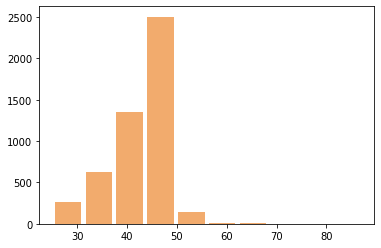

In [ ]:


plt.hist(x=df1["Location"], bins = 10, color='#F2AB6D', rwidth=0.85)

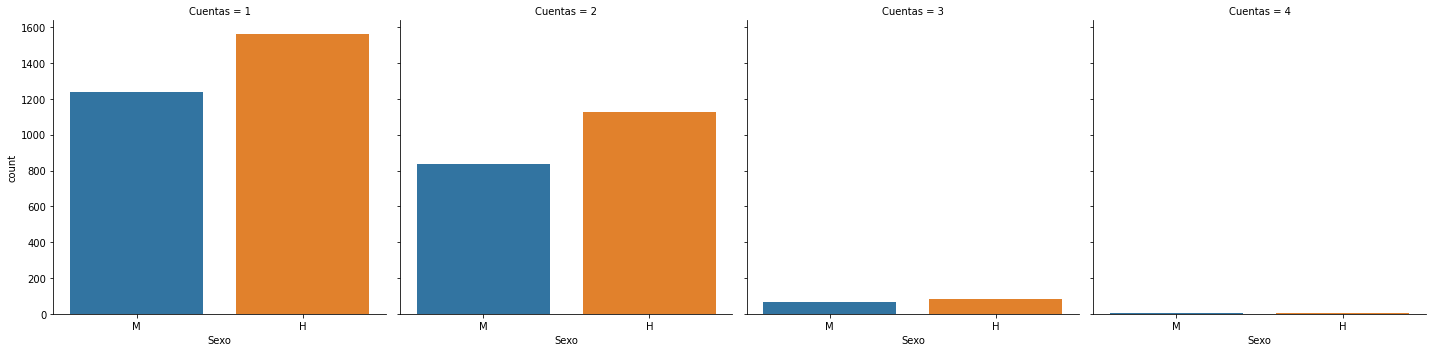

In [ ]:
sns.catplot(x='Location', col='Cuentas', kind='count', data=df);

In [ ]:
df1['Antiguedad'].unique()

array([130,  69,  24, 134, 116,  67,  21,  33,  23,  38,  59,  80,  29,
        13,   7,  22,  72,  94,  43,  18, 184,  63,  49,  14, 109,  11,
       160,  31, 105,  27,  78,  60, 152,  10,  36,  28,  19,  26,  75,
        70,  58,  48,  74,  15,  30, 125,  64,   6,  61, 149,   8,  87,
        35, 145,  16,  47,  20,  39,   9,  25, 154,  84,  73,  55, 108,
        66,  92,  50,  65,  34,  32,  17,  82,  86,  99,  96,  53,  83,
       180, 137, 117,  68, 139,  12, 111,  93, 106, 107,  79,  56,  88,
       133,  81, 101,  41,  57,  45, 188,  44,  71,  37,  52,  97, 119,
       148,  54, 155, 113,  42, 143, 110, 115,  40, 120,  85,  98,  51,
       127, 140, 150, 131,  77, 122,  95, 100, 142, 156, 151, 114, 112,
       121, 118,  62, 126,  90,  46, 138,  76, 128, 141, 136, 123, 132,
        89, 104, 147, 153, 102, 144, 103, 162,  91, 163, 178, 158, 135,
       129, 157, 124, 177, 168, 171, 165, 146, 159])

In [ ]:

df1.isnull().sum()

Subsegmento          0
Sexo                 0
Region               5
Edad                 0
Renta              679
Antiguedad           0
Internauta           0
Adicional            0
Dualidad             0
Monoproducto         0
Ctacte               0
Consumo              0
Hipotecario          0
Debito               0
CambioPin         2047
Cuentas              0
TC                   0
CUPO_L1              0
CUPO_L2              0
CUPO_MX              0
FlgAct_T12         578
FlgActCN_T12       578
FlgActCI_T12       578
FlgActAN_T12       578
FlgActAI_T12       578
FlgActPAT_T12      578
FlgActCCPC_T12     578
FlgActCCOT_T12     578
FlgActCOL_T12      578
Fac_T12            578
Txs_T12            578
FacCN_T12          578
TxsCN_T12          578
FacCI_T12          578
TxsCI_T12          578
FacAN_T12          578
TxsAN_T12          578
FacAI_T12          578
TxsAI_T12          578
FacPAT_T12         578
TxsPAT_T12         578
FacCCPC_T12        578
TxsCCPC_T12        578
FacCCOT_T12

In [ ]:

df1.columns.values

array(['Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte',
       'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC',
       'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'FlgAct_T12', 'FlgActCN_T12',
       'FlgActCI_T12', 'FlgActAN_T12', 'FlgActAI_T12', 'FlgActPAT_T12',
       'FlgActCCPC_T12', 'FlgActCCOT_T12', 'FlgActCOL_T12', 'Fac_T12',
       'Txs_T12', 'FacCN_T12', 'TxsCN_T12', 'FacCI_T12', 'TxsCI_T12',
       'FacAN_T12', 'TxsAN_T12', 'FacAI_T12', 'TxsAI_T12', 'FacPAT_T12',
       'TxsPAT_T12', 'FacCCPC_T12', 'TxsCCPC_T12', 'FacCCOT_T12',
       'TxsCCOT_T12', 'FacCOL_T12', 'TxsCOL_T12', 'FacDebCom_T12',
       'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12',
       'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12'], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


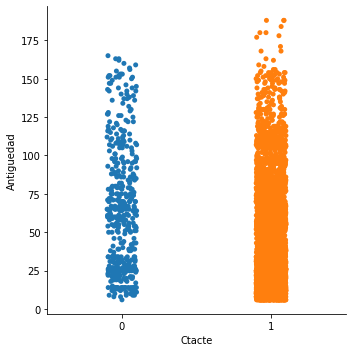

In [ ]:
sns.catplot('Ctacte','Antiguedad', data=df1);

In [ ]:
df1.groupby(['Consumo','Sexo'])['Region'].count()

Consumo  Sexo
0        H       2767
         M       2135
1        H          2
         M          3
Name: Region, dtype: int64

In [ ]:
pd.crosstab([df1.Sexo], [df1.Cuentas, df1.Renta, df1.Antiguedad], margins=True)

Cuentas      1                                   ...         3        4  \
Renta      1.0                    2.0 3.0 404.0  ... 2500000.0 317400.0   
Antiguedad  11 20 23 26 32 74 111  84  49     7  ...        41       86   
Sexo                                             ...                      
H            0  0  1  0  0  1   1   1   1     1  ...         0        0   
M            1  1  0  1  1  0   0   0   0     0  ...         1        1   
All          1  1  1  1  1  1   1   1   1     1  ...         1        1   

Cuentas                                                                      \
Renta      451707.0 681066.0 700000.0 847222.0 946660.0 1508968.0 1862416.0   
Antiguedad       84       89       24       38       73        68       113   
Sexo                                                                          
H                 0        0        1        0        0         1         1   
M                 1        1        0        1        1         0         0   
All               1        1        1        1        1         1         1   

Cuentas      All  
Renta             
Antiguedad        
Sexo              
H           2410  
M           1823  
All         4233  

[3 rows x 4212 columns]

In [ ]:
pd.crosstab(df1.Sexo, df1.Antiguedad, margins=True).style.background_gradient(cmap='autumn_r')

Antiguedad,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,162,163,165,168,171,177,178,180,184,188,All
Sexo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
H,53,65,59,73,63,66,59,71,60,50,42,52,32,44,40,42,69,48,39,53,52,46,29,28,31,37,31,40,49,32,29,24,32,38,17,17,11,22,16,14,10,10,7,15,10,16,17,16,22,25,34,15,26,28,20,34,19,15,14,28,16,18,20,13,36,13,11,15,8,37,9,17,12,17,5,10,14,9,17,10,15,16,10,6,4,7,12,5,5,7,20,6,9,9,3,7,2,2,3,10,22,9,14,12,11,11,2,8,6,5,11,4,4,6,4,4,4,1,1,5,5,7,2,2,4,2,1,1,3,3,1,5,2,0,5,4,4,3,5,1,0,3,3,5,4,4,3,3,2,1,1,1,1,2,1,0,2,1,1,0,1,1,2,1,1,2769
M,40,33,39,35,46,55,53,59,57,37,27,34,28,31,40,37,42,29,32,58,61,39,17,23,32,47,32,22,39,28,23,13,33,18,10,10,8,9,20,9,9,8,14,10,10,12,12,30,15,23,28,11,16,24,19,27,18,18,7,15,17,14,12,12,23,13,7,13,12,11,5,6,14,10,10,9,9,11,7,7,14,2,4,8,8,4,3,6,5,12,13,7,6,5,2,3,3,3,0,4,18,10,10,10,7,3,8,3,4,4,6,5,5,6,4,4,4,3,1,0,0,3,2,0,7,2,2,1,0,0,2,0,5,2,0,0,1,3,1,1,1,3,0,3,0,2,5,2,5,1,2,0,0,0,0,2,1,0,1,1,0,0,0,0,2,2143
All,93,98,98,108,109,121,112,130,117,87,69,86,60,75,80,79,111,77,71,111,113,85,46,51,63,84,63,62,88,60,52,37,65,56,27,27,19,31,36,23,19,18,21,25,20,28,29,46,37,48,62,26,42,52,39,61,37,33,21,43,33,32,32,25,59,26,18,28,20,48,14,23,26,27,15,19,23,20,24,17,29,18,14,14,12,11,15,11,10,19,33,13,15,14,5,10,5,5,3,14,40,19,24,22,18,14,10,11,10,9,17,9,9,12,8,8,8,4,2,5,5,10,4,2,11,4,3,2,3,3,3,5,7,2,5,4,5,6,6,2,1,6,3,8,4,6,8,5,7,2,3,1,1,2,1,2,3,1,2,1,1,1,2,1,3,4912


In [ ]:
pd.crosstab([df1.Sexo, df1.Ctacte], df1.Region, margins=True).style.background_gradient(cmap='autumn_r')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


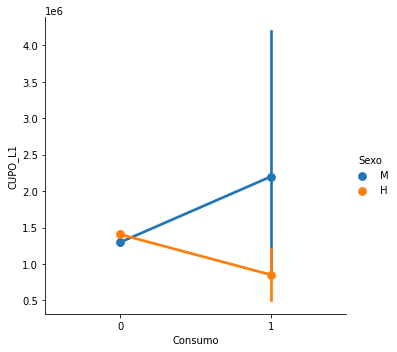

In [ ]:
sns.catplot('Consumo','CUPO_L1',hue='Sexo', kind='point', data=df1);

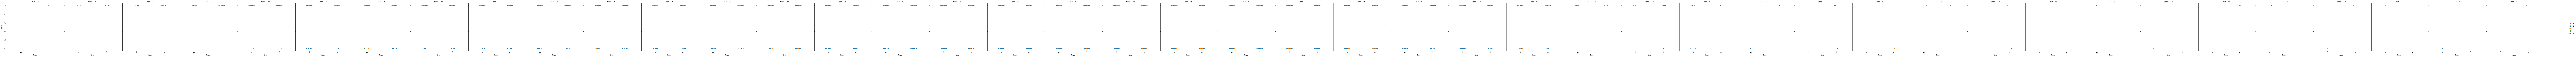

In [ ]:
sns.catplot('Sexo','Debito', col='Edad', hue= 'Cuentas', data=df1);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


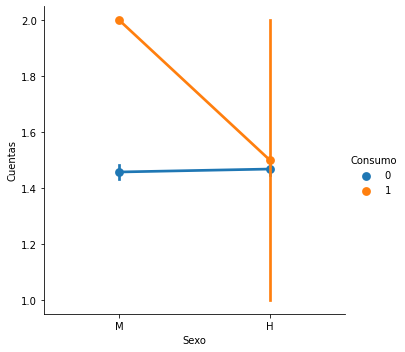

In [ ]:
sns.catplot('Sexo','Cuentas', hue= 'Consumo', kind='point', data=df1);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


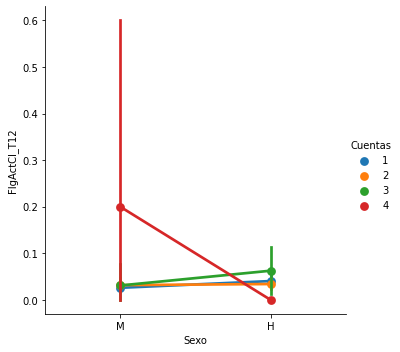

In [ ]:
sns.catplot('Sexo','FlgActCI_T12', hue= 'Cuentas', kind='point', data=df1);

In [ ]:
pd.crosstab([df1.Sexo], [df1.Cuentas, df1.Renta, df1.FlgActCN_T12], margins=True)

Cuentas        1                                                              \
Renta        1.0     2.0 3.0 33333.0 34333.0 49800.0 58094.0 73214.0 83160.0   
FlgActCN_T12 0.0 1.0 1.0 0.0     1.0     0.0     0.0     0.0     1.0     1.0   
Sexo                                                                           
H              1   2   1   1       1       1       1       1       0       0   
M              3   0   0   0       0       0       0       0       1       1   
All            4   2   1   1       1       1       1       1       1       1   

Cuentas       ...         3        4                                      \
Renta         ... 2500000.0 317400.0 451707.0 681066.0 700000.0 847222.0   
FlgActCN_T12  ...       0.0      0.0      1.0      0.0      1.0      1.0   
Sexo          ...                                                          
H             ...         0        0        0        0        1        0   
M             ...         1        1        1        1        0        1   
All           ...         1        1        1        1        1        1   

Cuentas                                     All  
Renta        946660.0 1508968.0 1862416.0        
FlgActCN_T12      0.0       0.0       1.0        
Sexo                                             
H                   0         1         1  2063  
M                   1         0         0  1610  
All                 1         1         1  3673  

[3 rows x 3578 columns]

In [ ]:
for df in [df1, df1]:
    df['Cuentas']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['FlgActAN_T12'] <= i*10, 'Renta'] = i
print(df1[['Renta' , 'FlgActAN_T12']].head(10))

    Renta  FlgActAN_T12
Id                     
1     1.0           0.0
2     1.0           0.0
3     1.0           0.0
4     1.0           0.0
5     1.0           0.0
6     1.0           0.0
7     1.0           0.0
8     1.0           0.0
9     1.0           0.0
10    1.0           0.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4912 entries, 1 to 4912
Data columns (total 55 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Subsegmento     4912 non-null   int64  
 1   Sexo            4912 non-null   object 
 2   Region          4907 non-null   float64
 3   Edad            4912 non-null   int64  
 4   Renta           4233 non-null   float64
 5   Antiguedad      4912 non-null   int64  
 6   Internauta      4912 non-null   int64  
 7   Adicional       4912 non-null   int64  
 8   Dualidad        4912 non-null   int64  
 9   Monoproducto    4912 non-null   int64  
 10  Ctacte          4912 non-null   int64  
 11  Consumo         4912 non-null   int64  
 12  Hipotecario     4912 non-null   int64  
 13  Debito          4912 non-null   int64  
 14  CambioPin       2865 non-null   float64
 15  Cuentas         4912 non-null   int64  
 16  TC              4912 non-null   int64  
 17  CUPO_L1         4912 non-null   i

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


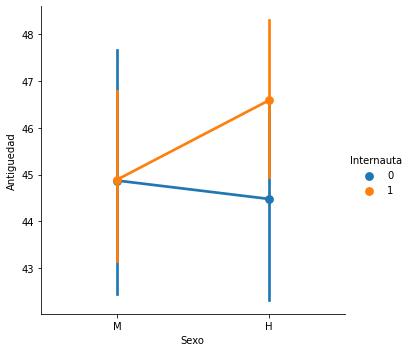

In [ ]:
sns.catplot('Sexo','Antiguedad',hue='Internauta',kind='point',data=df1);

In [ ]:
sns.catplot('TxsDebAtm_T12','Cuentas', col='Renta' , row = 'TxsDebAtm_T12', data=df1);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [ ]:
df1.describe()

,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,...,TxsCCOT_T12,FacCOL_T12,TxsCOL_T12,FacDebCom_T12,TxsDebCom_T12,FacDebAtm_T12,TxsDebAtm_T12,ColL1T0_T12,ColL1TE_T12,ColL2T0_T12
count,4912.000000,4907.000000,4912.000000,4.233000e+03,4912.000000,4912.000000,4912.000000,4912.000000,4912.000000,4912.000000,...,4334.000000,4.334000e+03,4334.000000,4.334000e+03,4334.000000,4.334000e+03,4334.000000,4.334000e+03,4.334000e+03,4.334000e+03
mean,168.223941,10.894233,42.492264,7.163154e+05,45.380497,0.615635,0.319218,0.432818,0.081433,0.899430,...,0.120443,5.470005e+03,0.002538,6.863061e+04,4.698431,2.395300e+05,5.581680,4.177153e+04,1.459578e+05,2.717303e+04
std,23.425728,3.319085,5.415945,4.185161e+05,35.119431,0.486494,0.466221,0.495516,0.273527,0.300789,...,0.421313,1.567284e+05,0.050321,1.526876e+05,9.636754,4.100765e+05,8.265703,1.039915e+05,2.980351e+05,7.194370e+04
min,151.000000,1.000000,25.000000,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,160.000000,9.000000,40.000000,4.506030e+05,17.750000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,170.000000,13.000000,44.000000,6.210000e+05,33.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,5.750000e+04,2.000000,0.000000e+00,3.650000e+01,0.000000e+00
75%,170.000000,13.000000,46.000000,8.958100e+05,65.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000e+00,0.000000,6.769925e+04,5.000000,3.400000e+05,8.000000,4.365800e+04,1.564942e+05,2.495600e+04
max,959.000000,13.000000,87.000000,5.404920e+06,188.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,7.500000e+06,1.000000,1.688366e+06,111.000000,5.240000e+06,108.000000,2.682426e+06,3.343998e+06,1.447507e+06


In [ ]:
fig = plt.figure(figsize=(15,200))
sns.catplot('Edad','Ctacte', hue= 'Sexo', kind='point', data=df_train);

NameError: ignored